# Brazilian E-Commerce Public Dataset by Olist

### About the Dataset

#### This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.

## This notebook combined all the data sources together into one large pandas Dataframe for analysis. 

### Data Schema 

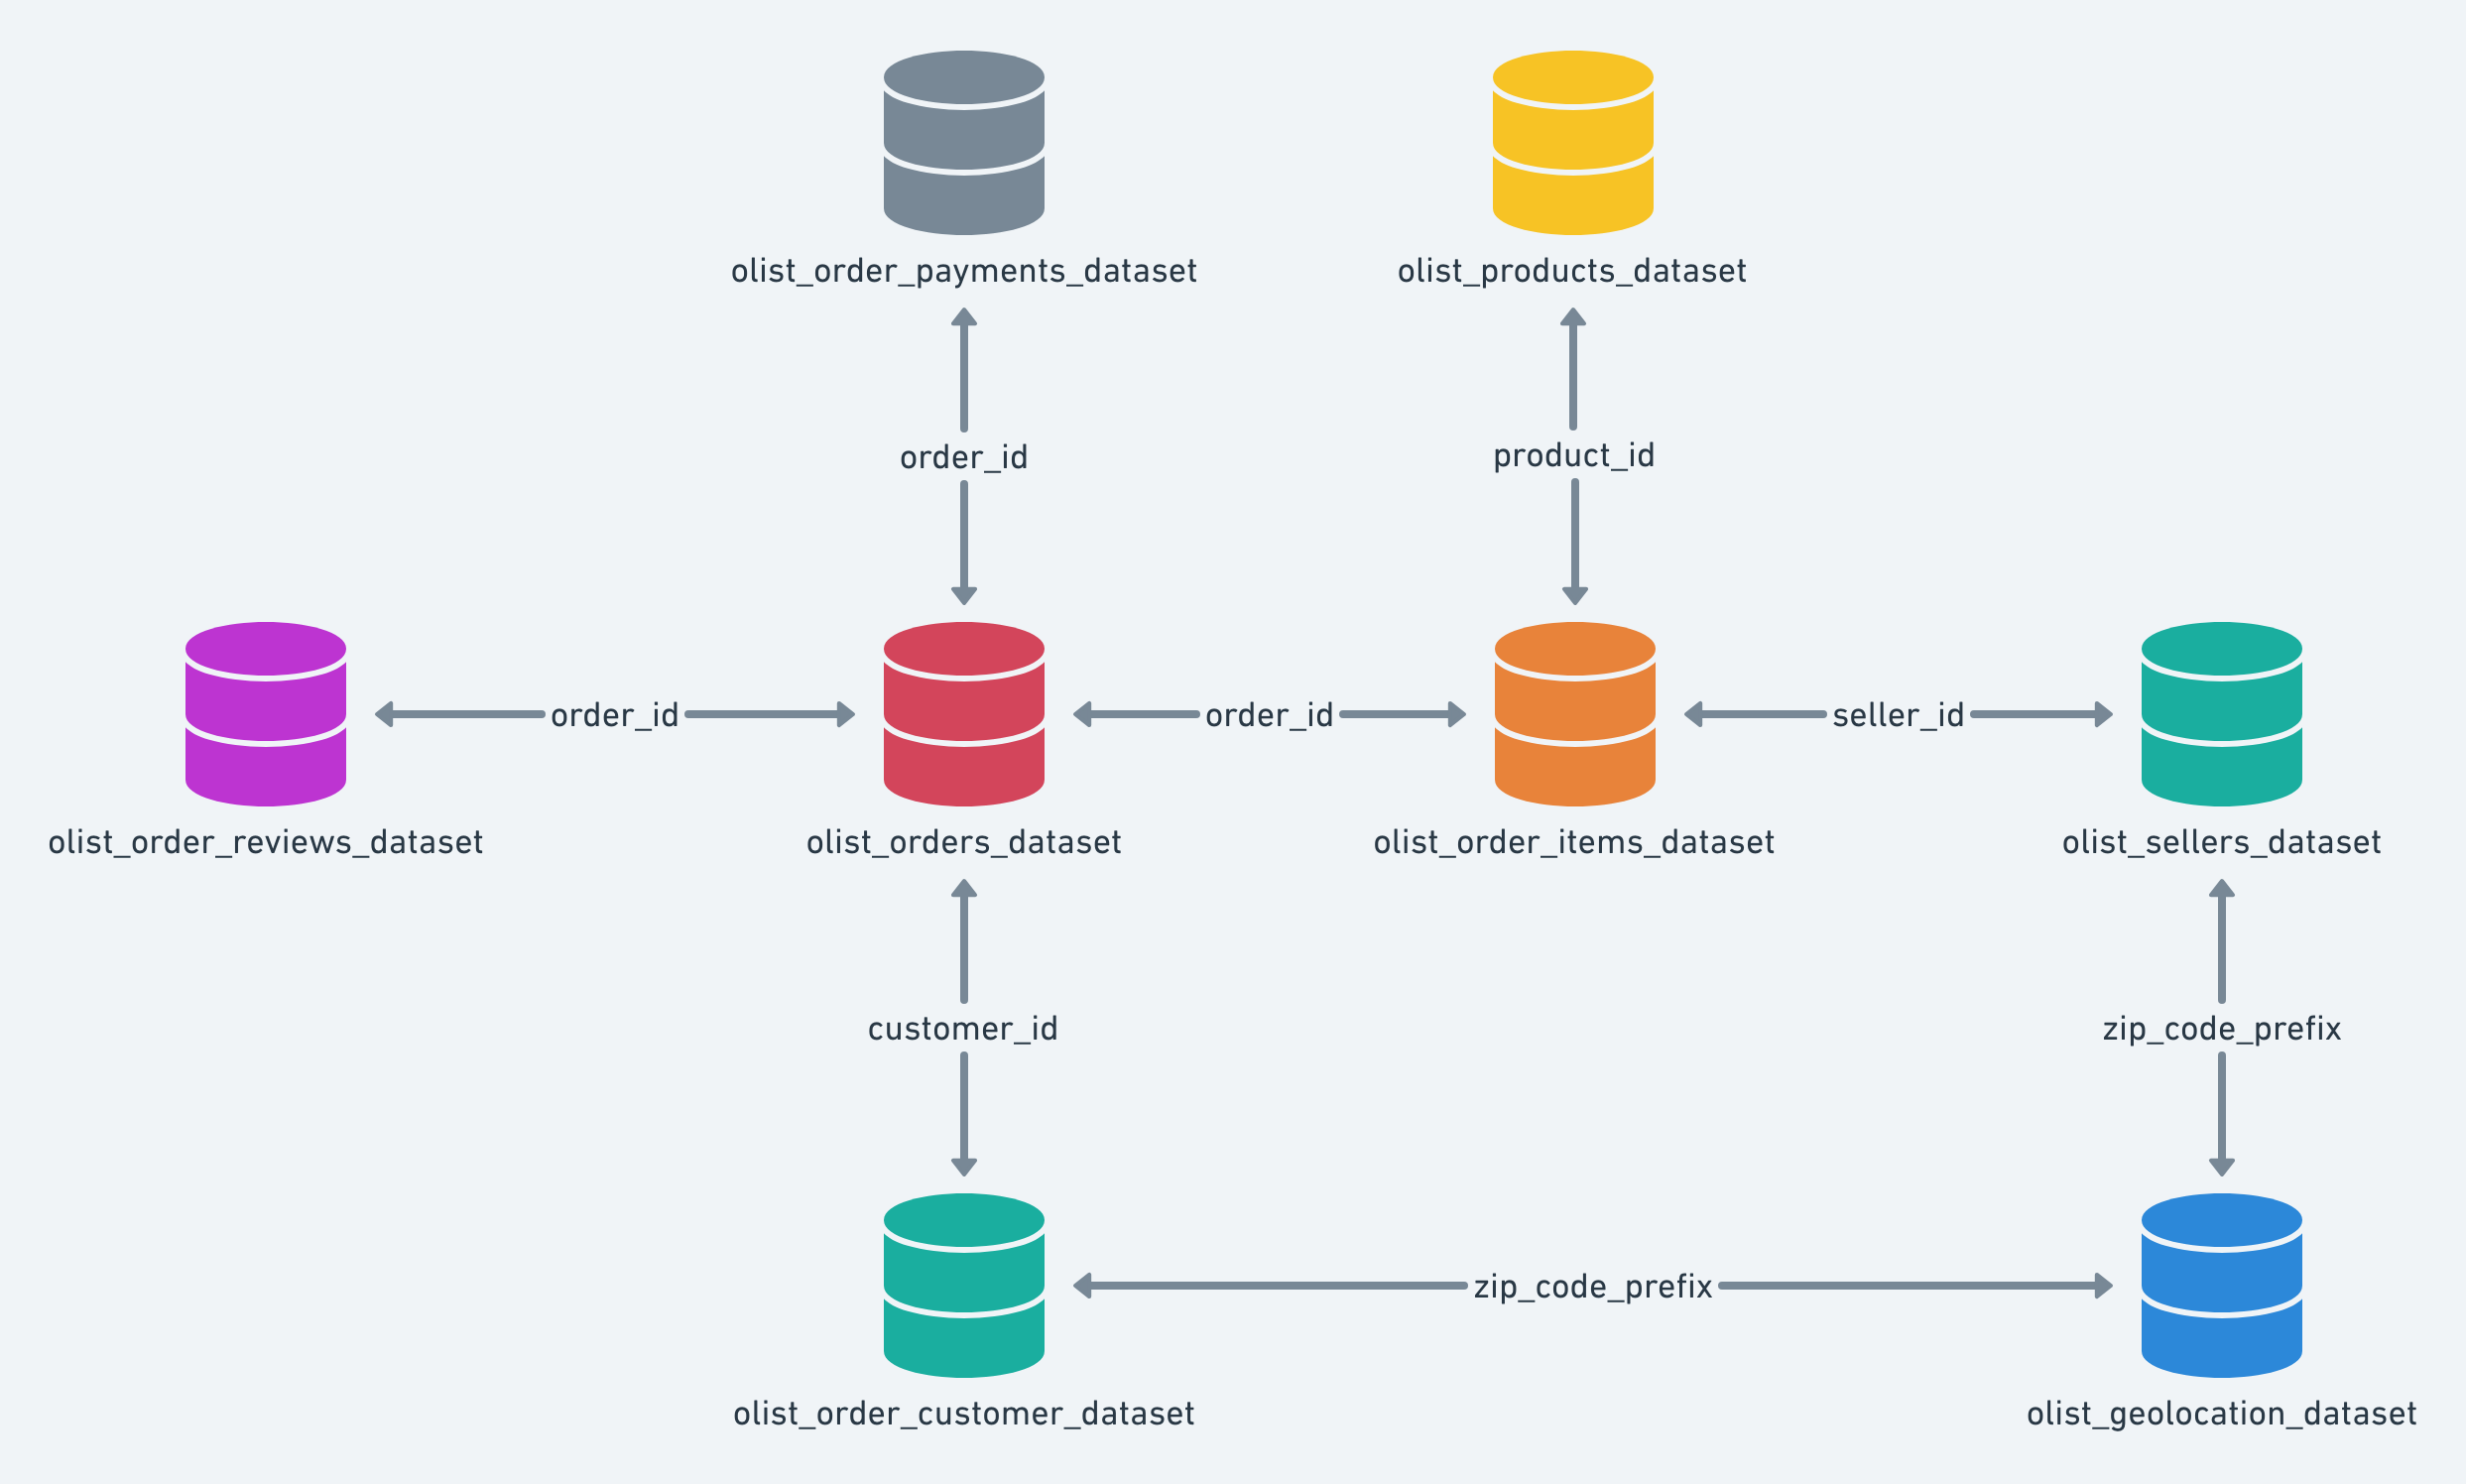

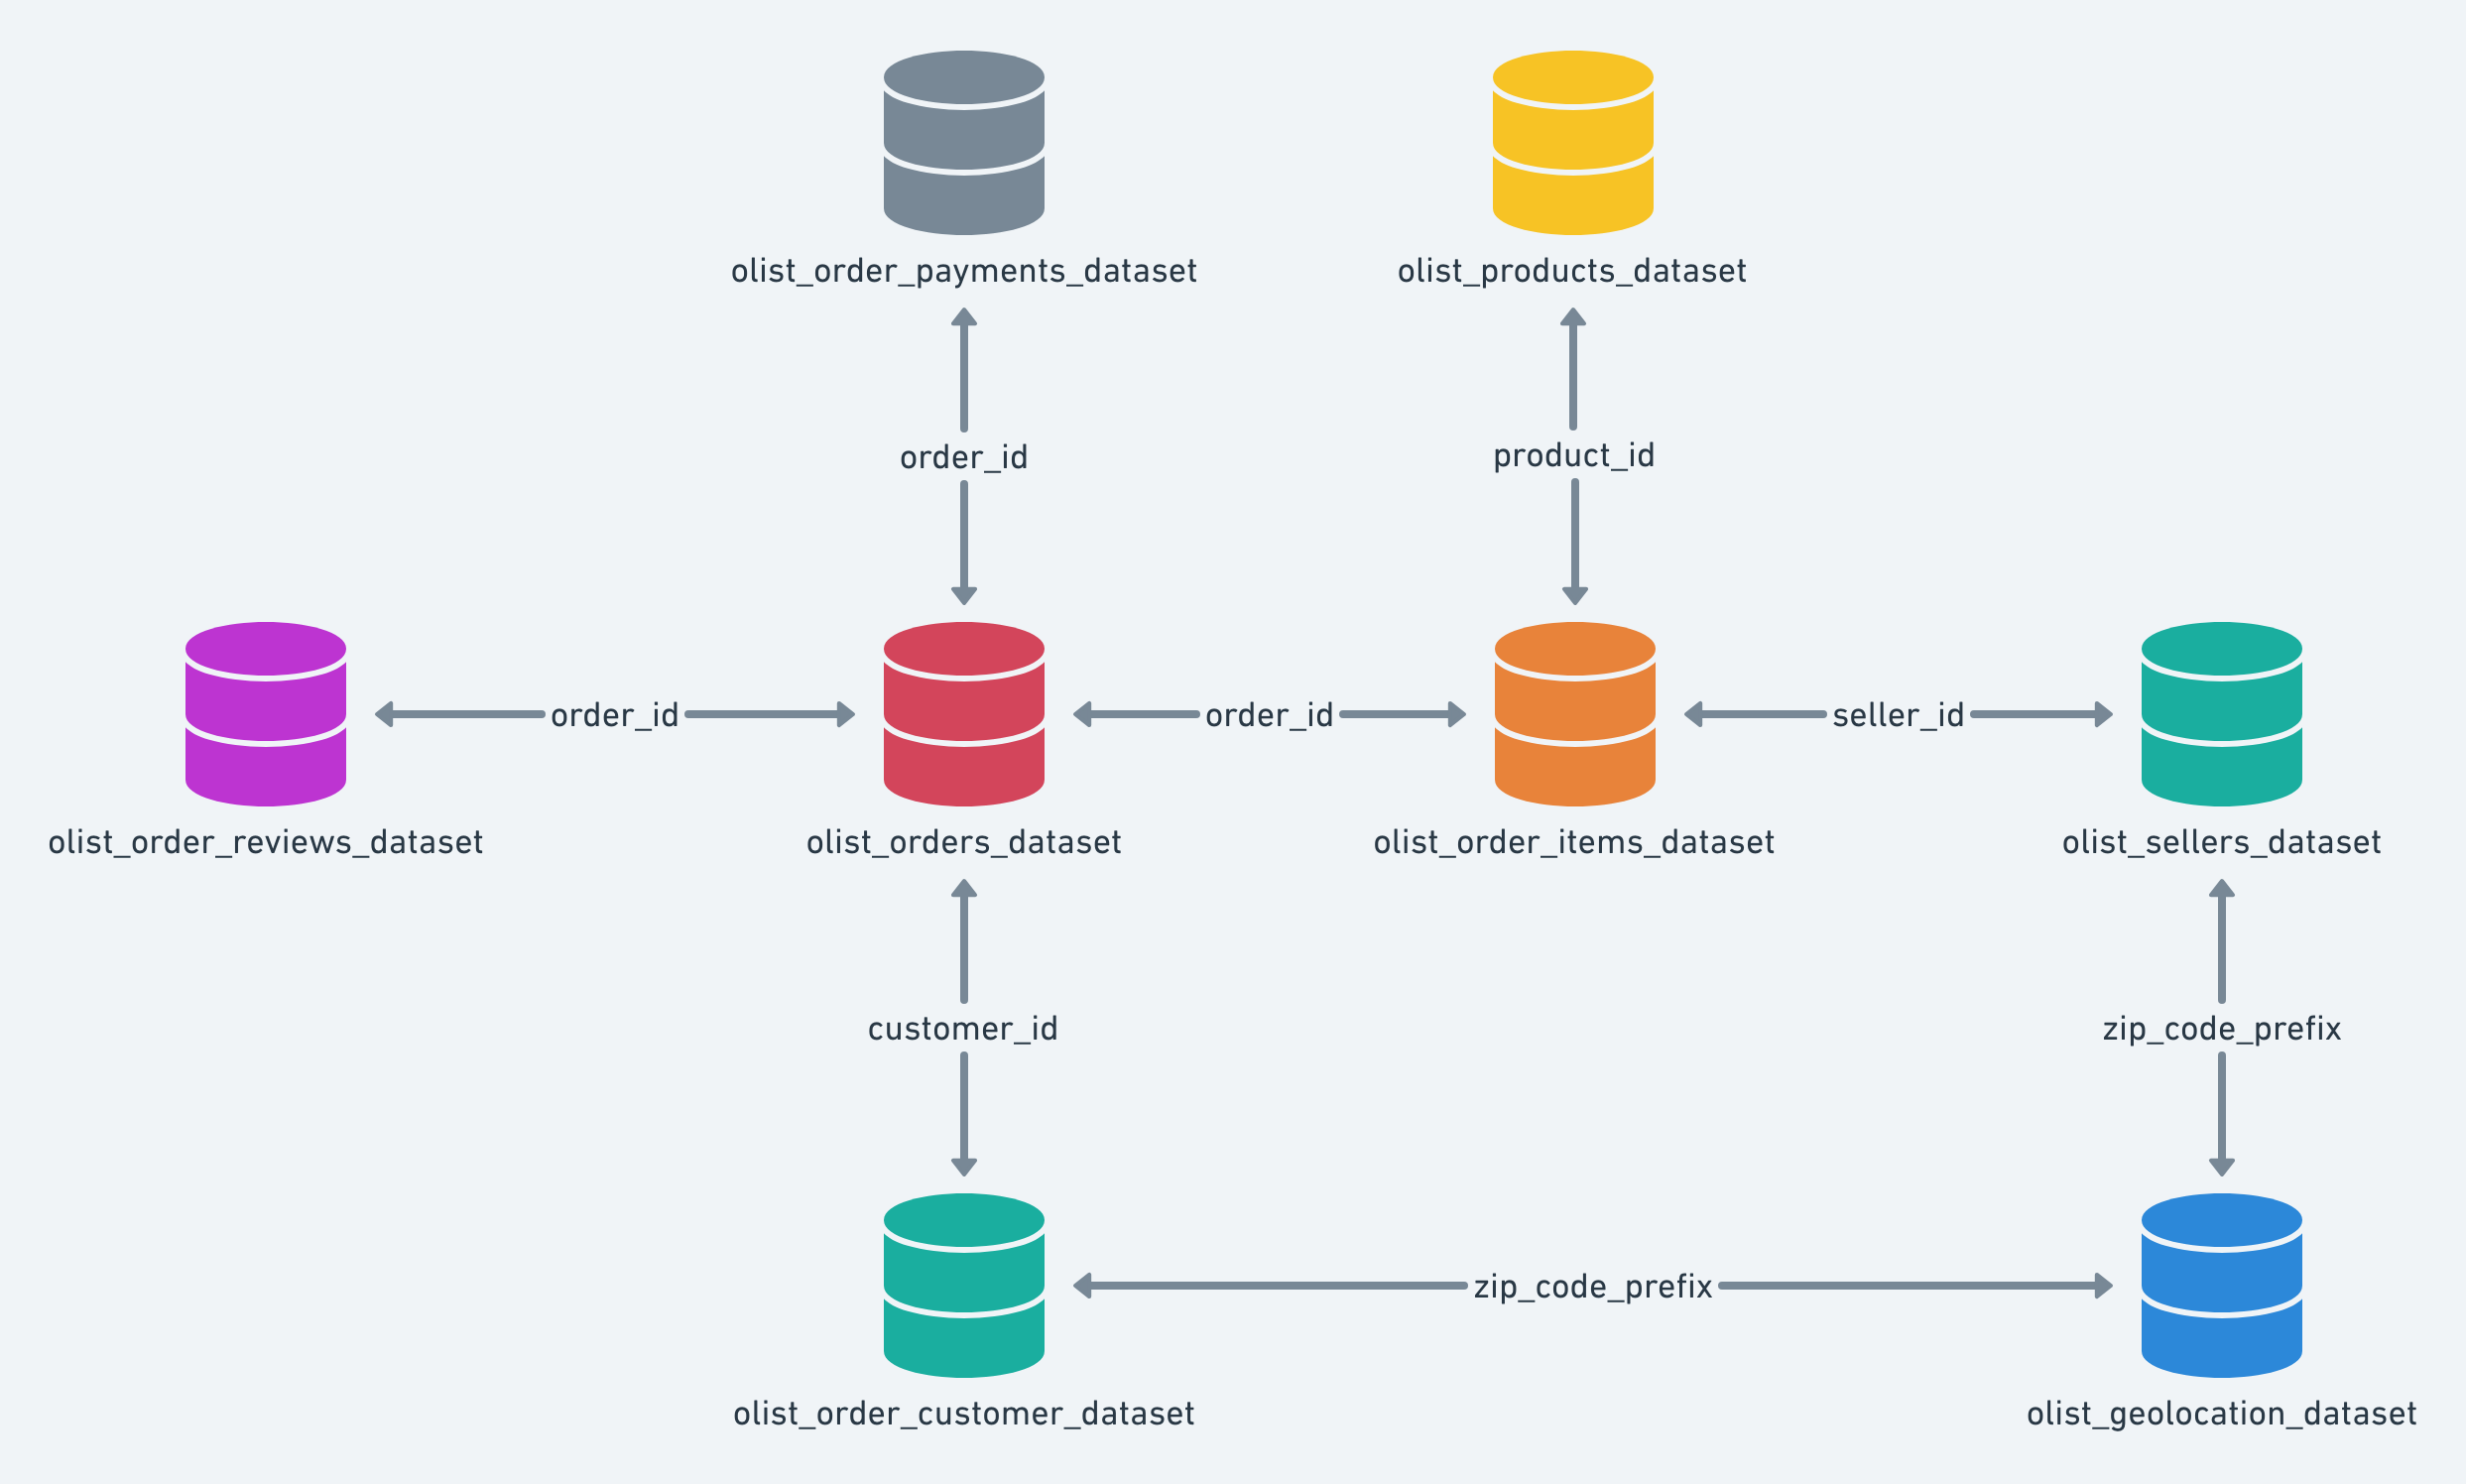

### Data visualizations utilizing matplotlib, seaborn, and Plotly

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
from scipy import stats 
import os

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(f'\'{os.path.join(dirname, filename)}\'')

'/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv'
'/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv'
'/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv'
'/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv'
'/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv'
'/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv'
'/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv'
'/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv'
'/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv'


### Importing data and merging datasets. 

In [2]:
df_item = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_reviews = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df_sellers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
df_order_pay = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
df_category = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
df_geolocation = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')

### Merging to a combined dataframe. 

In [3]:
df = df_orders.merge(df_item, on='order_id', how='left')
df = df.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df = df.merge(df_reviews, on='order_id', how='outer')
df = df.merge(df_products, on='product_id', how='outer')
df = df.merge(df_customers, on='customer_id', how='outer')
df = df.merge(df_sellers, on='seller_id', how='outer')
df = df.merge(df_category, on='product_category_name', how='outer')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,b02f2888891cd431e71f2f0a9a85e7b8,53d5e3e5a2eb022edd3570dde355947b,delivered,2018-04-28 23:14:00,2018-05-01 02:10:24,2018-05-02 15:14:00,2018-05-04 00:03:45,2018-05-16 00:00:00,1.0,0b2a1288e8ba64c797e7586c8df75602,06579cb253ecd5a3a12a9e6eb6bf8f47,2018-05-07 02:10:24,96.9,7.54,1.0,boleto,1.0,104.44,7e2dea23a52b5601773bf9e2ea9e6b91,5.0,Muito bom e pratico.,Otimo produto pro dia a dia.\r\n,2018-05-05 00:00:00,2018-05-07 22:23:20,agro_industria_e_comercio,38.0,397.0,1.0,3450.0,33.0,36.0,33.0,03a4abdc6deb7b5b3c18b4cde6d63761,7500,santa isabel,SP,4007.0,sao paulo - sp,SP,agro_industry_and_commerce
1,73455801790c8a31e404a3d4861f3d61,d04b1ea9de553c20d8315f98cf8289a2,delivered,2017-12-10 23:01:37,2017-12-10 23:17:27,2017-12-11 23:25:37,2017-12-20 16:48:51,2017-12-28 00:00:00,1.0,3a2b04bd67f105099d662e522bec56e9,06579cb253ecd5a3a12a9e6eb6bf8f47,2017-12-14 23:17:27,89.9,7.88,1.0,credit_card,9.0,97.78,9e64f0997df9ff040667677751c4030a,4.0,NaN,NaN,2017-12-21 00:00:00,2017-12-31 12:29:11,agro_industria_e_comercio,38.0,397.0,1.0,3275.0,35.0,37.0,19.0,d3beb4deb410a98b8f5406a88aa1ad94,13206,jundiai,SP,4007.0,sao paulo - sp,SP,agro_industry_and_commerce
2,9df16fc9c0296bef63c2effb85d6969c,7dfcf04eef8eb511409413ca6bed1fed,delivered,2018-06-25 21:02:52,2018-06-25 21:15:26,2018-06-27 11:32:00,2018-07-12 22:11:16,2018-08-02 00:00:00,1.0,1df0508de978ce519aa5533ae04154c7,0ed6ce5d87fd9c69eaacaeb778d67235,2018-07-04 21:15:26,124.9,43.15,1.0,credit_card,3.0,168.05,f2d2620c4423b341b38a58c3a0caa022,5.0,10,NaN,2018-07-13 00:00:00,2018-07-14 22:03:39,agro_industria_e_comercio,59.0,707.0,5.0,1900.0,40.0,15.0,20.0,9b6839b18c37508b3a07fdec4c9572c0,62350,ubajara,CE,13473.0,americana,SP,agro_industry_and_commerce
3,e4865416690d1f1fdad49bc94f871de6,8457dd875ae43c9b34240808ff8bb757,delivered,2017-11-29 12:48:56,2017-11-29 13:15:54,2017-12-05 18:53:19,2017-12-06 16:59:11,2017-12-13 00:00:00,1.0,cf4f52b8f3c906f11d98e8866614f140,0ed6ce5d87fd9c69eaacaeb778d67235,2017-12-05 13:15:54,39.9,9.74,1.0,boleto,1.0,49.64,8c3000c17781e092bff3e1df8711c794,4.0,NaN,NaN,2017-12-07 00:00:00,2017-12-08 03:47:27,agro_industria_e_comercio,54.0,365.0,2.0,600.0,30.0,15.0,15.0,0a7c72fec6e7d7917460e5a26f09dce9,12900,braganca paulista,SP,13473.0,americana,SP,agro_industry_and_commerce
4,5e0ff060a686922559e33f8dbe998e41,ba03825db0f92dbade0ec0278a6e26ae,delivered,2018-07-24 21:30:58,2018-07-24 21:45:09,2018-08-09 15:19:00,2018-08-13 19:16:51,2018-08-15 00:00:00,1.0,ba1d7e7ee1f055d252a2faa8ea3cea9b,0ed6ce5d87fd9c69eaacaeb778d67235,2018-08-05 21:45:09,109.9,15.08,1.0,credit_card,2.0,124.98,9f98c17fd117aef60d72f3f94338232e,5.0,NaN,NaN,2018-08-14 00:00:00,2018-08-17 00:38:22,agro_industria_e_comercio,59.0,693.0,6.0,1900.0,45.0,15.0,40.0,7f4b3e37f62fd76ce20deebe1f898718,16901,andradina,SP,13473.0,americana,SP,agro_industry_and_commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,87ae60ef8b08ae0e5f903cacb53a6904,fea4d57ed3a45455f89c25ef3dae8ee8,canceled,2018-09-11 16:45:54,NaN,NaN,NaN,2018-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,258.67,c9a026e699be6426bdc58731e6eec225,1.0,NaN,"Solicitei um produto e foi entregue outro, est...",2018-08-23 00:00:

## Feature Engineering 

### Change columns with dates to datetime type. 

### Calculate profit, total order value, and volume of packages 

### Add hour, day, month time columns for analysis

### Determine time difference between when an item is purchased and when it is delivered. As well as the estimated versus the actual delivery time. 

In [4]:
#Create columns to calculate total order value, profit, and volume. 
df['total_order_value'] = df['price'] + df['freight_value']
df['gross_profit'] = df['payment_value']- df['total_order_value']
df['profit_margin'] = df['gross_profit']/df['payment_value']
df['volume'] = df['product_height_cm']*df['product_length_cm']*df['product_width_cm']
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_order_value,gross_profit,profit_margin,volume
0,b02f2888891cd431e71f2f0a9a85e7b8,53d5e3e5a2eb022edd3570dde355947b,delivered,2018-04-28 23:14:00,2018-05-01 02:10:24,2018-05-02 15:14:00,2018-05-04 00:03:45,2018-05-16 00:00:00,1.0,0b2a1288e8ba64c797e7586c8df75602,06579cb253ecd5a3a12a9e6eb6bf8f47,2018-05-07 02:10:24,96.9,7.54,1.0,boleto,1.0,104.44,7e2dea23a52b5601773bf9e2ea9e6b91,5.0,Muito bom e pratico.,Otimo produto pro dia a dia.\r\n,2018-05-05 00:00:00,2018-05-07 22:23:20,agro_industria_e_comercio,38.0,397.0,1.0,3450.0,33.0,36.0,33.0,03a4abdc6deb7b5b3c18b4cde6d63761,7500,santa isabel,SP,4007.0,sao paulo - sp,SP,agro_industry_and_commerce,104.44,-1.421085e-14,-1.360672e-16,39204.0
1,73455801790c8a31e404a3d4861f3d61,d04b1ea9de553c20d8315f98cf8289a2,delivered,2017-12-10 23:01:37,2017-12-10 23:17:27,2017-12-11 23:25:37,2017-12-20 16:48:51,2017-12-28 00:00:00,1.0,3a2b04bd67f105099d662e522bec56e9,06579cb253ecd5a3a12a9e6eb6bf8f47,2017-12-14 23:17:27,89.9,7.88,1.0,credit_card,9.0,97.78,9e64f0997df9ff040667677751c4030a,4.0,NaN,NaN,2017-12-21 00:00:00,2017-12-31 12:29:11,agro_industria_e_comercio,38.0,397.0,1.0,3275.0,35.0,37.0,19.0,d3beb4deb410a98b8f5406a88aa1ad94,13206,jundiai,SP,4007.0,sao paulo - sp,SP,agro_industry_and_commerce,97.78,0.000000e+00,0.000000e+00,24605.0
2,9df16fc9c0296bef63c2effb85d6969c,7dfcf04eef8eb511409413ca6bed1fed,delivered,2018-06-25 21:02:52,2018-06-25 21:15:26,2018-06-27 11:32:00,2018-07-12 22:11:16,2018-08-02 00:00:00,1.0,1df0508de978ce519aa5533ae04154c7,0ed6ce5d87fd9c69eaacaeb778d67235,2018-07-04 21:15:26,124.9,43.15,1.0,credit_card,3.0,168.05,f2d2620c4423b341b38a58c3a0caa022,5.0,10,NaN,2018-07-13 00:00:00,2018-07-14 22:03:39,agro_industria_e_comercio,59.0,707.0,5.0,1900.0,40.0,15.0,20.0,9b6839b18c37508b3a07fdec4c9572c0,62350,ubajara,CE,13473.0,americana,SP,agro_industry_and_commerce,168.05,0.000000e+00,0.000000e+00,12000.0
3,e4865416690d1f1fdad49bc94f871de6,8457dd875ae43c9b34240808ff8bb757,delivered,2017-11-29 12:48:56,2017-11-29 13:15:54,2017-12-05 18:53:19,2017-12-06 16:59:11,2017-12-13 00:00:00,1.0,cf4f52b8f3c906f11d98e8866614f140,0ed6ce5d87fd9c69eaacaeb778d67235,2017-12-05 13:15:54,39.9,9.74,1.0,boleto,1.0,49.64,8c3000c17781e092bff3e1df8711c794,4.0,NaN,NaN,2017-12-07 00:00:00,2017-12-08 03:47:27,agro_industria_e_comercio,54.0,365.0,2.0,600.0,30.0,15.0,15.0,0a7c72fec6e7d7917460e5a26f09dce9,12900,braganca paulista,SP,13473.0,americana,SP,agro_industry_and_commerce,49.64,0.000000e+00,0.000000e+00,6750.0
4,5e0ff060a686922559e33f8dbe998e41,ba03825db0f92dbade0ec0278a6e26ae,delivered,2018-07-24 21:30:58,2018-07-24 21:45:09,2018-08-09 15:19:00,2018-08-13 19:16:51,2018-08-15 00:00:00,1.0,ba1d7e7ee1f055d252a2faa8ea3cea9b,0ed6ce5d87fd9c69eaacaeb778d67235,2018-08-05 21:45:09,109.9,15.08,1.0,credit_card,2.0,124.98,9f98c17fd117aef60d72f3f94338232e,5.0,NaN,NaN,2018-08-14 00:00:00,2018-08-17 00:38:22,agro_industria_e_comercio,59.0,693.0,6.0,1900.0,45.0,15.0,40.0,7f4b3e37f62fd76ce20deebe1f898718,16901,andradina,SP,13473.0,americana,SP,agro_industry_and_commerce,124.98,0.000000e+00,0.000000e+00,27000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,87ae60ef8b08

In [5]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date','review_creation_date', 'review_answer_timestamp']

for column in df.columns:
    if column in date_columns:
        df[column] = pd.to_datetime(df[column])

df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_comment_title                    

In [6]:
#Create columns for hour, day, and month for analysis with time. 
#Calculate time deltas of time to deliver an item purchased and difference between estimated and actual delivery times
df['hour'] = df['order_purchase_timestamp'].dt.hour
df['day'] = df['order_purchase_timestamp'].dt.day
df['month'] = df['order_purchase_timestamp'].dt.month
df['purchase_to_delivery'] = df['order_purchase_timestamp'] - df['order_delivered_customer_date']
df['estimated_to_delivery'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date'] 

## Data Visualization

### Chart shows the vast majority of orders are within 100,000 cubic centimeters and under $100 in freight value. 

<Axes: title={'center': 'Volume vs Freight Value'}, xlabel='volume', ylabel='freight_value'>

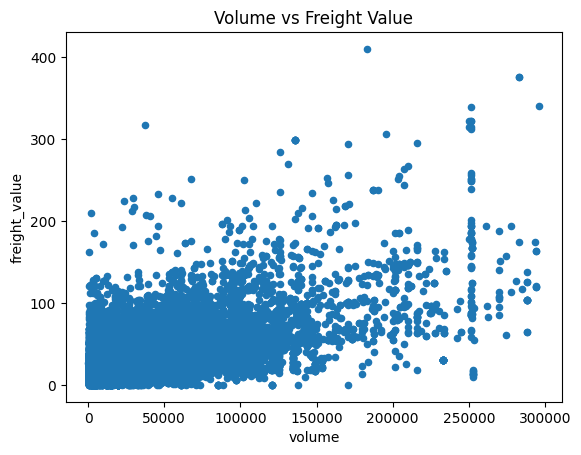

In [7]:
df[['volume','freight_value']].plot(kind='scatter', x='volume', y='freight_value', title='Volume vs Freight Value')

### Vast majority of orders are equal to or less than $100. Product weight does not greatly change shipping costs. 

<Axes: title={'center': 'Product Weight G vs Freight Value'}, xlabel='product_weight_g', ylabel='freight_value'>

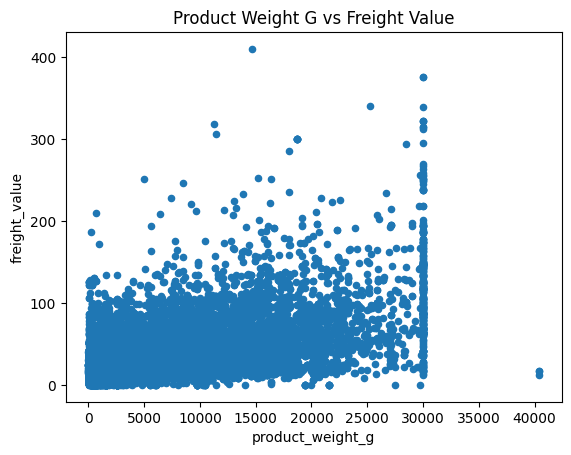

In [8]:
df[['product_weight_g','freight_value']].plot(kind='scatter', x='product_weight_g', y='freight_value', title='Product Weight G vs Freight Value')

In [9]:
df_dimensions = df[['freight_value','product_weight_g','volume']]

### 3D model of Volume and Weight versus Freight Value confirms vast majority of orders are within $100 

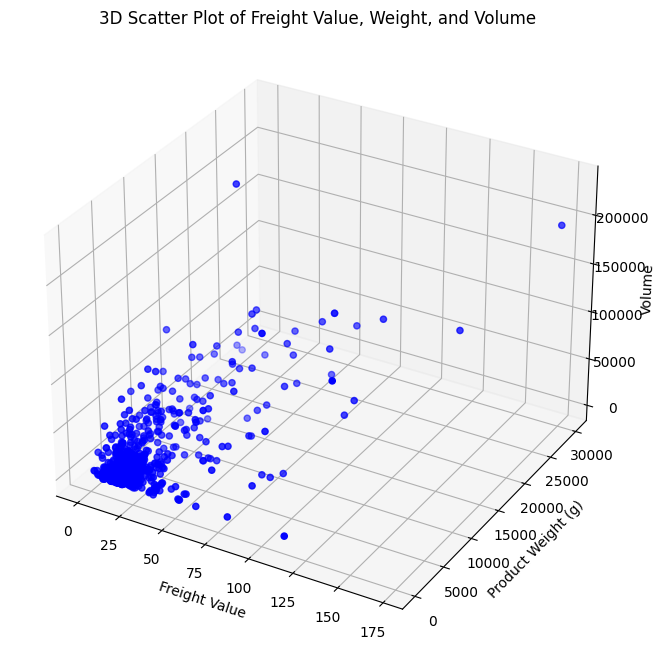

In [10]:
# Sample a subset of the data to speed up the plotting
df_sampled = df_dimensions.sample(n=1000, random_state=42)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sampled['freight_value'], df_sampled['product_weight_g'], df_sampled['volume'], c='b', marker='o')
ax.set_xlabel('Freight Value')
ax.set_ylabel('Product Weight (g)')
ax.set_zlabel('Volume')
ax.set_title('3D Scatter Plot of Freight Value, Weight, and Volume')
plt.show()

### Chart displays the number of times the top five most profitable categories of items were sold. 

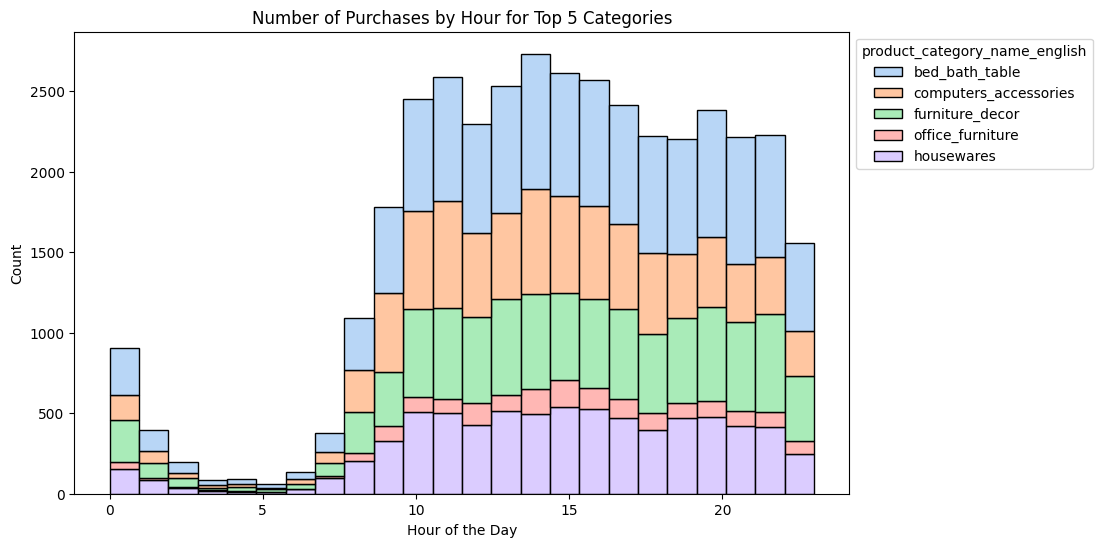

In [11]:
# Calculate the top five categories by gross profit
top_categories = df.groupby('product_category_name_english')['gross_profit'].sum().nlargest(5).index

# Filter the DataFrame to include only the top five categories
df_top = df[df['product_category_name_english'].isin(top_categories)]

# Plot the data
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_top, x='hour', multiple='stack', hue='product_category_name_english', bins=24, palette='pastel')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Number of Purchases by Hour for Top 5 Categories')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

### Majority of purchases occur from 10AM - 12 PM each day. Purchasing slows later in the month and noticably later in the year. 

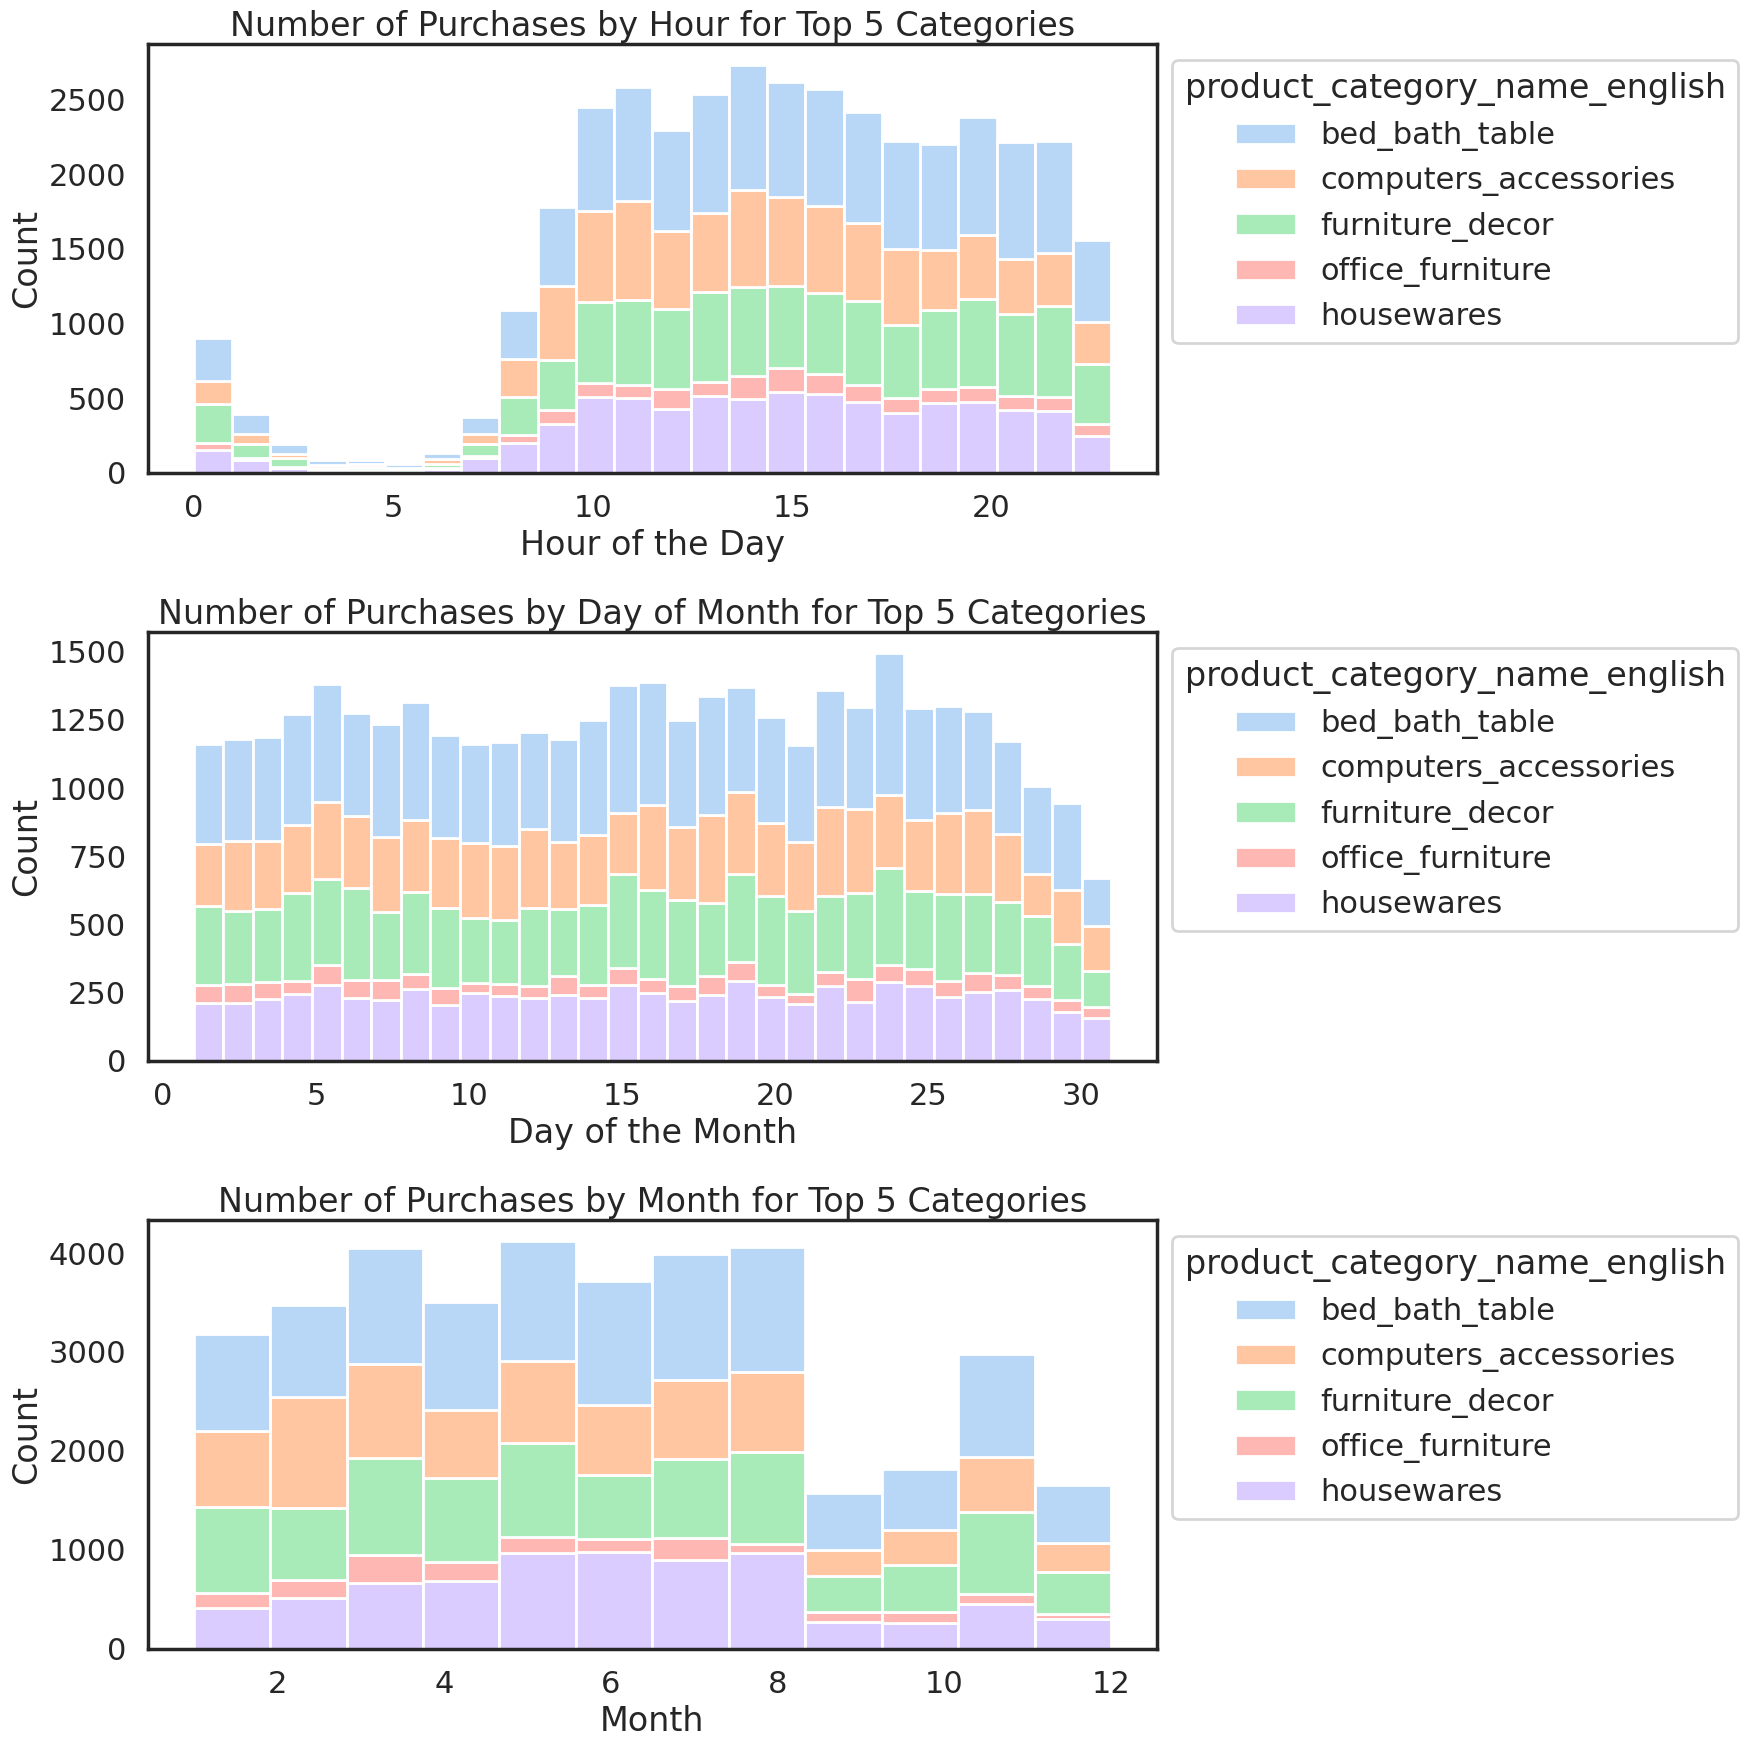

In [12]:
# Plot stacked histograms
plt.figure(figsize=(18, 18))

sns.set(style="white")
sns.set_context("poster")

# Hour
plt.subplot(3, 1, 1)
ax = sns.histplot(data=df_top, x='hour', multiple='stack', hue='product_category_name_english',bins=24, palette='pastel')
plt.title('Number of Purchases by Hour for Top 5 Categories')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Day
plt.subplot(3, 1, 2)
ax = sns.histplot(data=df_top, x='day', multiple='stack', hue='product_category_name_english',bins=31, palette='pastel')
plt.title('Number of Purchases by Day of Month for Top 5 Categories')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Month
plt.subplot(3, 1, 3)
ax = sns.histplot(data=df_top, x='month', multiple='stack', hue='product_category_name_english',bins=12, palette='pastel')
plt.title('Number of Purchases by Month for Top 5 Categories')
plt.xlabel('Month')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### Single largest order was for fixed telephones. There were single large purchases for auto parts and computer asscessories as well. 

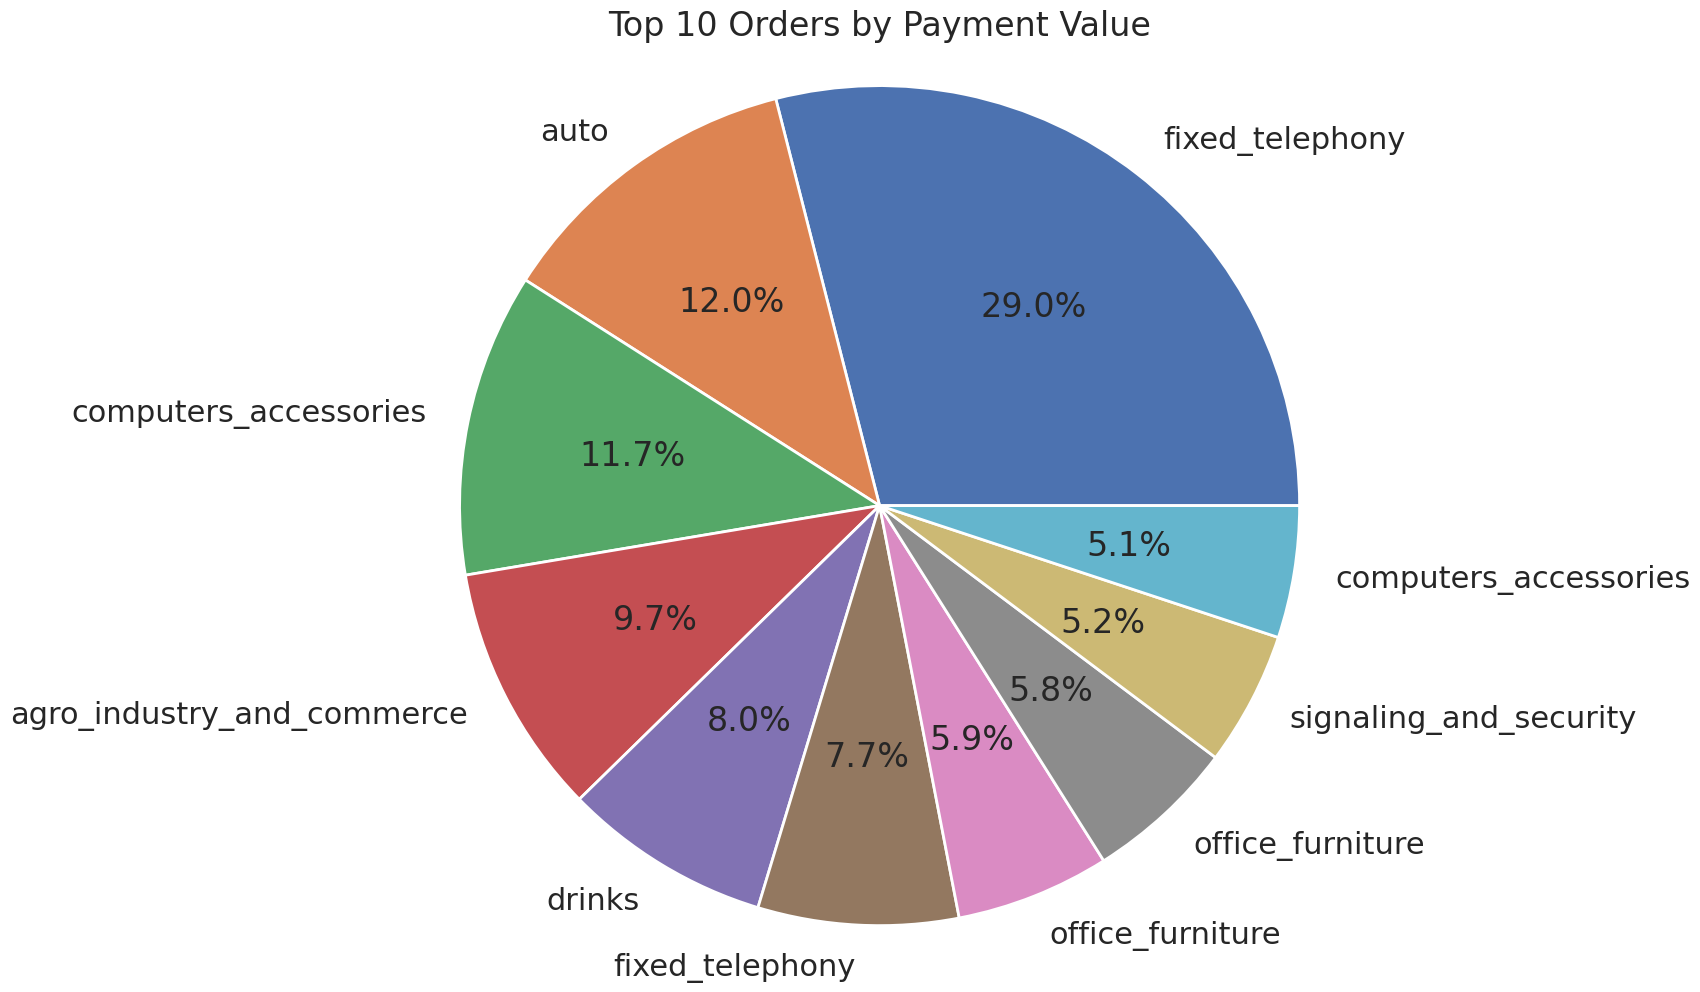

In [13]:
# Plot a pie chart of the top ten orders#
plt.figure(figsize=(15, 12))
top_orders = df.groupby(['order_id', 'product_category_name_english'])['payment_value'].sum().reset_index()
top_orders = top_orders.sort_values(by='payment_value', ascending=False)
top_ten_orders = top_orders.head(10)
plt.pie(top_ten_orders['payment_value'], labels=top_ten_orders['product_category_name_english'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 10 Orders by Payment Value')
plt.show()


### Per the cumulative Gross Profits chart, Computer Assessories contributes to largest amount of profit. Furniture decor was a close second. 

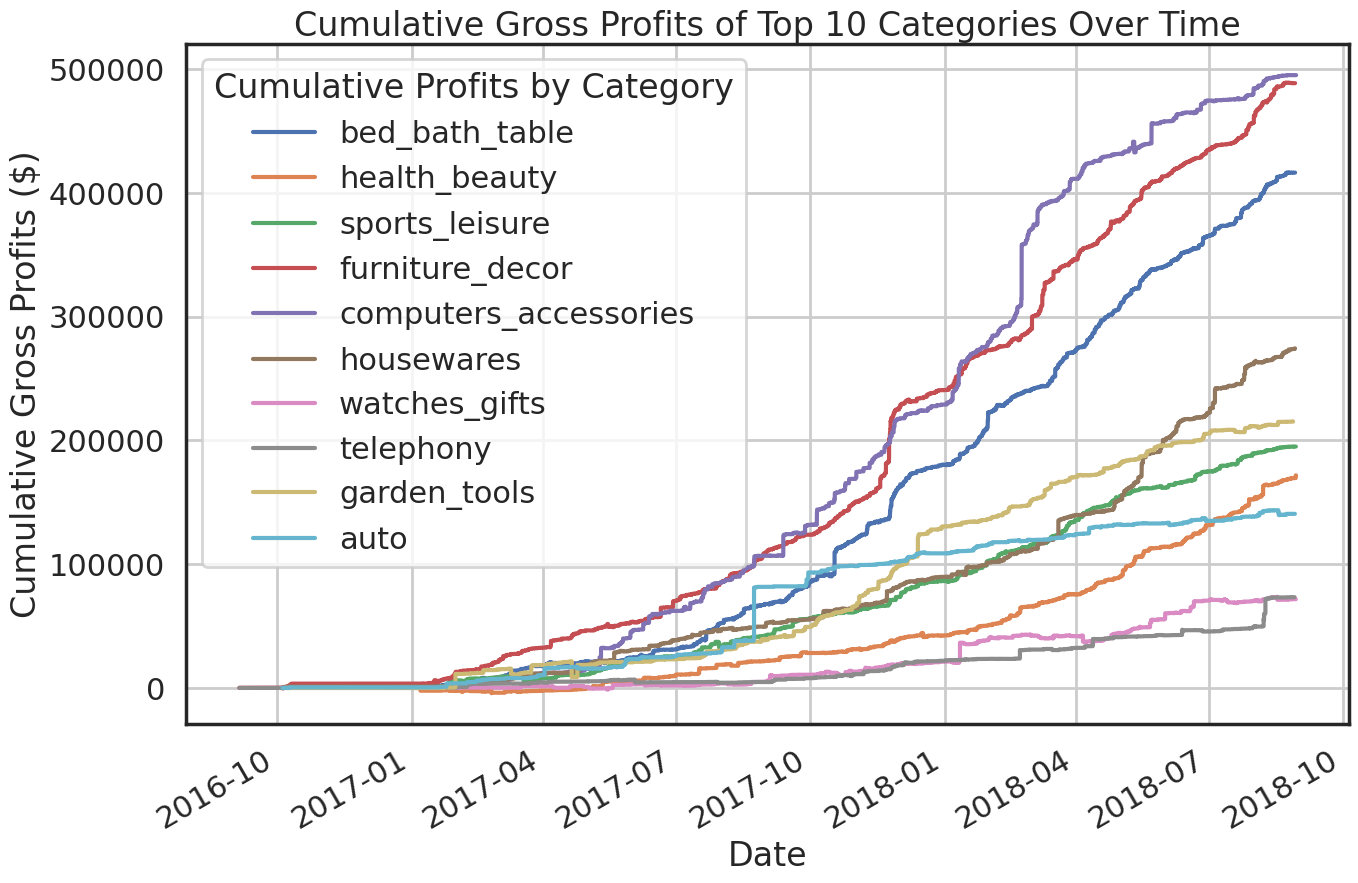

In [14]:
plt.figure(figsize=(15, 10))

top_ten_categories = df['product_category_name_english'].value_counts().nlargest(10).index

for category_name in top_ten_categories:
    category = df[df['product_category_name_english'] == category_name]
    
    # Calculate the cumulative sum of the 'gross_profit' column
    category = category.set_index('order_purchase_timestamp').sort_index()
    cumulative_sales = category['gross_profit'].cumsum()
    # Plot the cumulative sum of profit versus datetime
    cumulative_sales.plot(kind='line', label=category_name)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Gross Profits ($)')
plt.title('Cumulative Gross Profits of Top 10 Categories Over Time')
plt.grid(True)
plt.legend(title='Cumulative Profits by Category', loc='upper left')


### Chart shows on a single day, there was a very large purchase of more than 1500 items. 
### Removing some outliers and replotting to see average number of items purchased and profit generated

Text(0.5, 1.0, 'Gross Profit per Day')

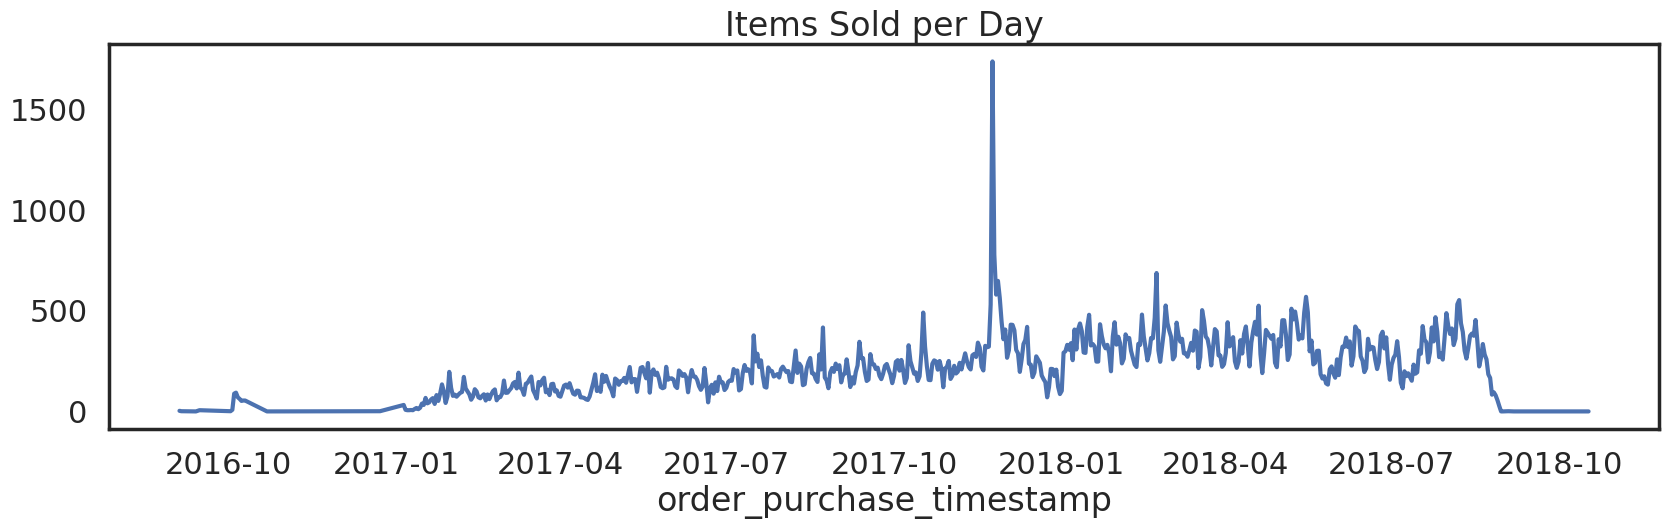

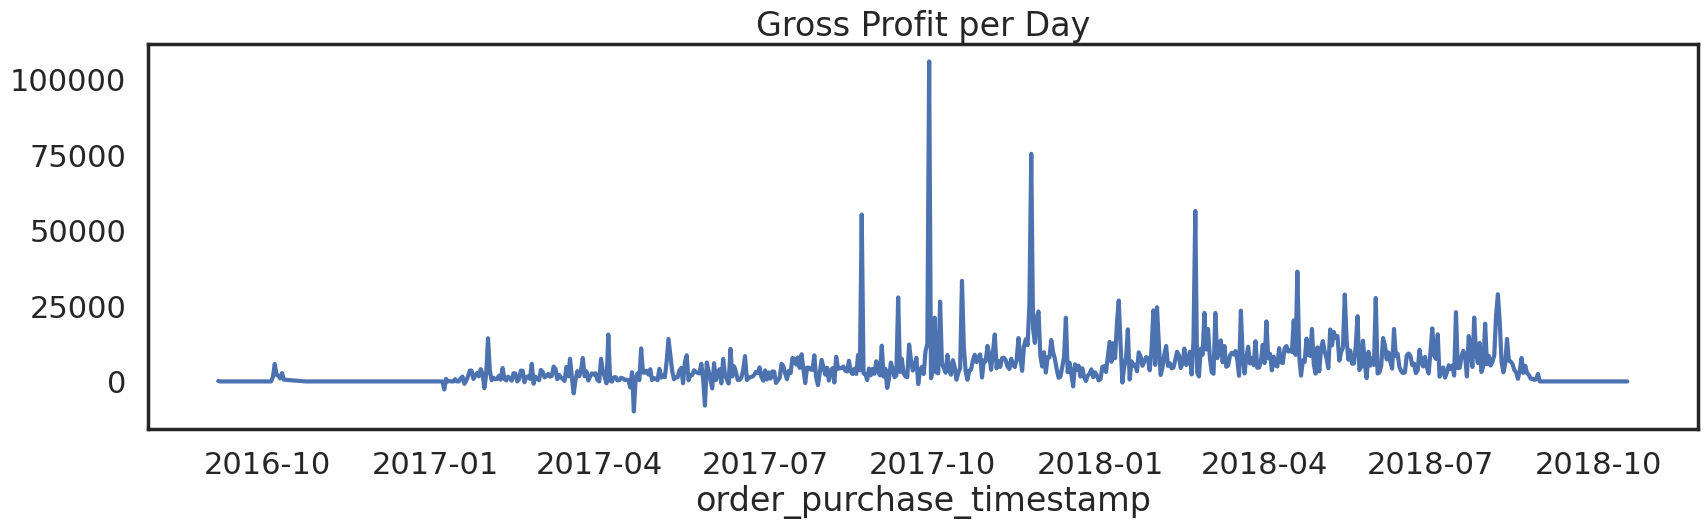

In [15]:
sales_per_purchase_date = df.groupby(df.order_purchase_timestamp.dt.date).order_item_id.sum()
sales_per_purchase_date
plt.figure(figsize=(20,5))
ax = sns.lineplot(x=sales_per_purchase_date.index, y=sales_per_purchase_date.values, data=sales_per_purchase_date)
ax.set_title('Items Sold per Day')
gross_profit_date = df.groupby(df.order_purchase_timestamp.dt.date).gross_profit.sum()
plt.figure(figsize=(20,5))
ax = sns.lineplot(x=gross_profit_date.index, y=gross_profit_date.values, data=gross_profit_date)
ax.set_title('Gross Profit per Day')

### Items sold per day have a healthy increase over the course of a year showing strong business growth and Olist market growing in popularity. 


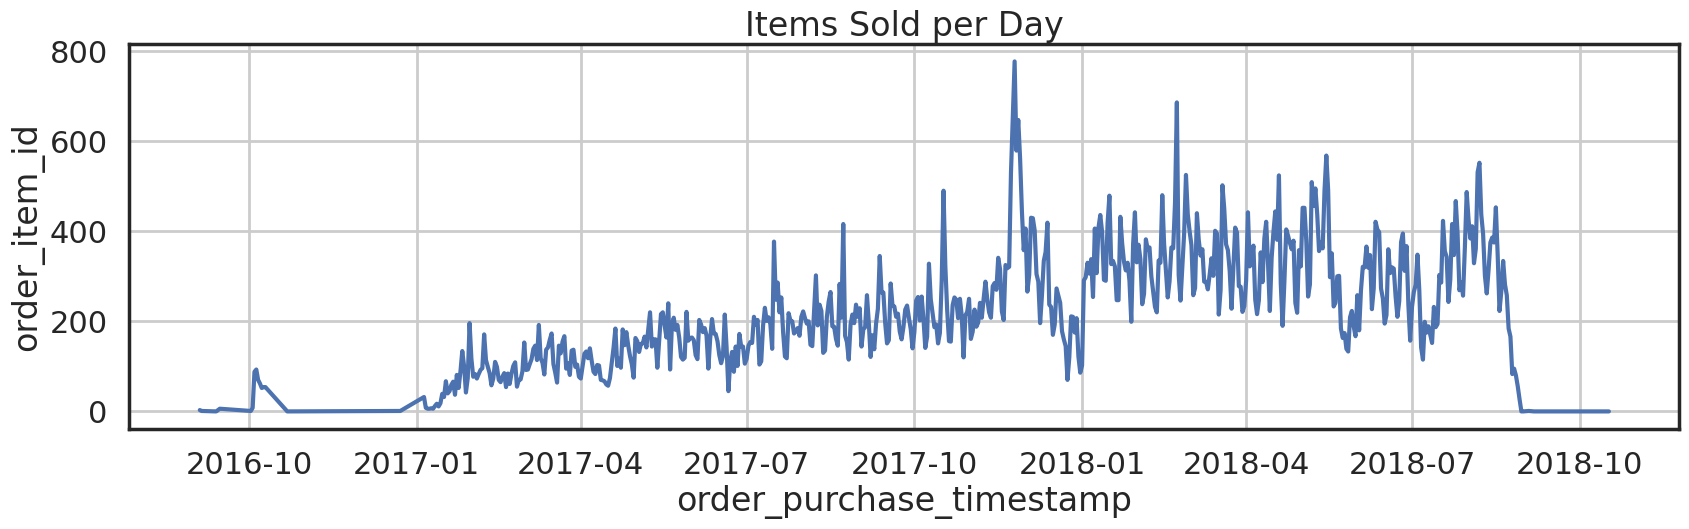

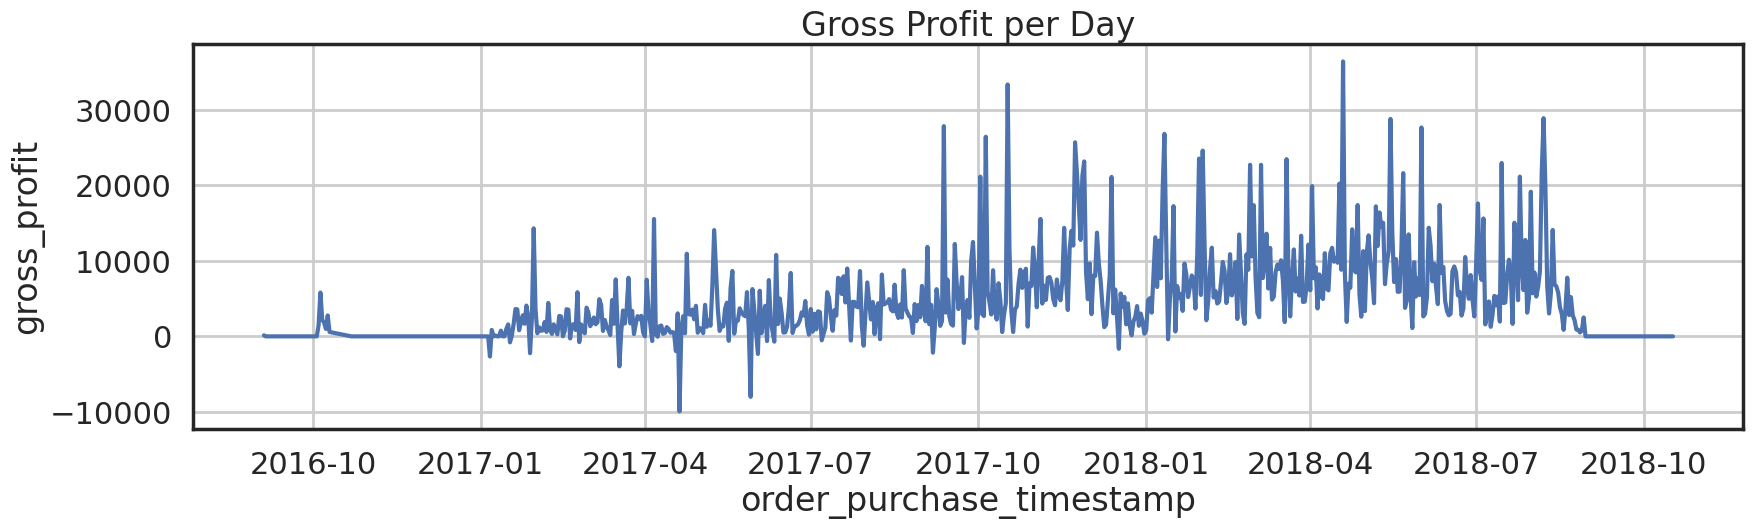

In [16]:
sales_per_purchase_date = df.groupby(df.order_purchase_timestamp.dt.date)['order_item_id'].sum().reset_index()
sales_per_purchase_date = sales_per_purchase_date[sales_per_purchase_date['order_item_id'] < 1000]
plt.figure(figsize=(20,5))
ax = sns.lineplot(x=sales_per_purchase_date['order_purchase_timestamp'], y=sales_per_purchase_date['order_item_id'], data=sales_per_purchase_date)
ax.set_title('Items Sold per Day')
ax.grid()

gross_profit_date = df.groupby(df.order_purchase_timestamp.dt.date).gross_profit.sum().reset_index()
gross_profit_date = gross_profit_date[gross_profit_date['gross_profit'] < 50000]
plt.figure(figsize=(20,5))
ax = sns.lineplot(x=gross_profit_date['order_purchase_timestamp'], y=gross_profit_date['gross_profit'], data=gross_profit_date)
ax.set_title('Gross Profit per Day')
ax.grid()

### May is the most profitable month. December surprisingly has the least business. 

Text(0.5, 1.0, 'Gross Profit per Month of Year')

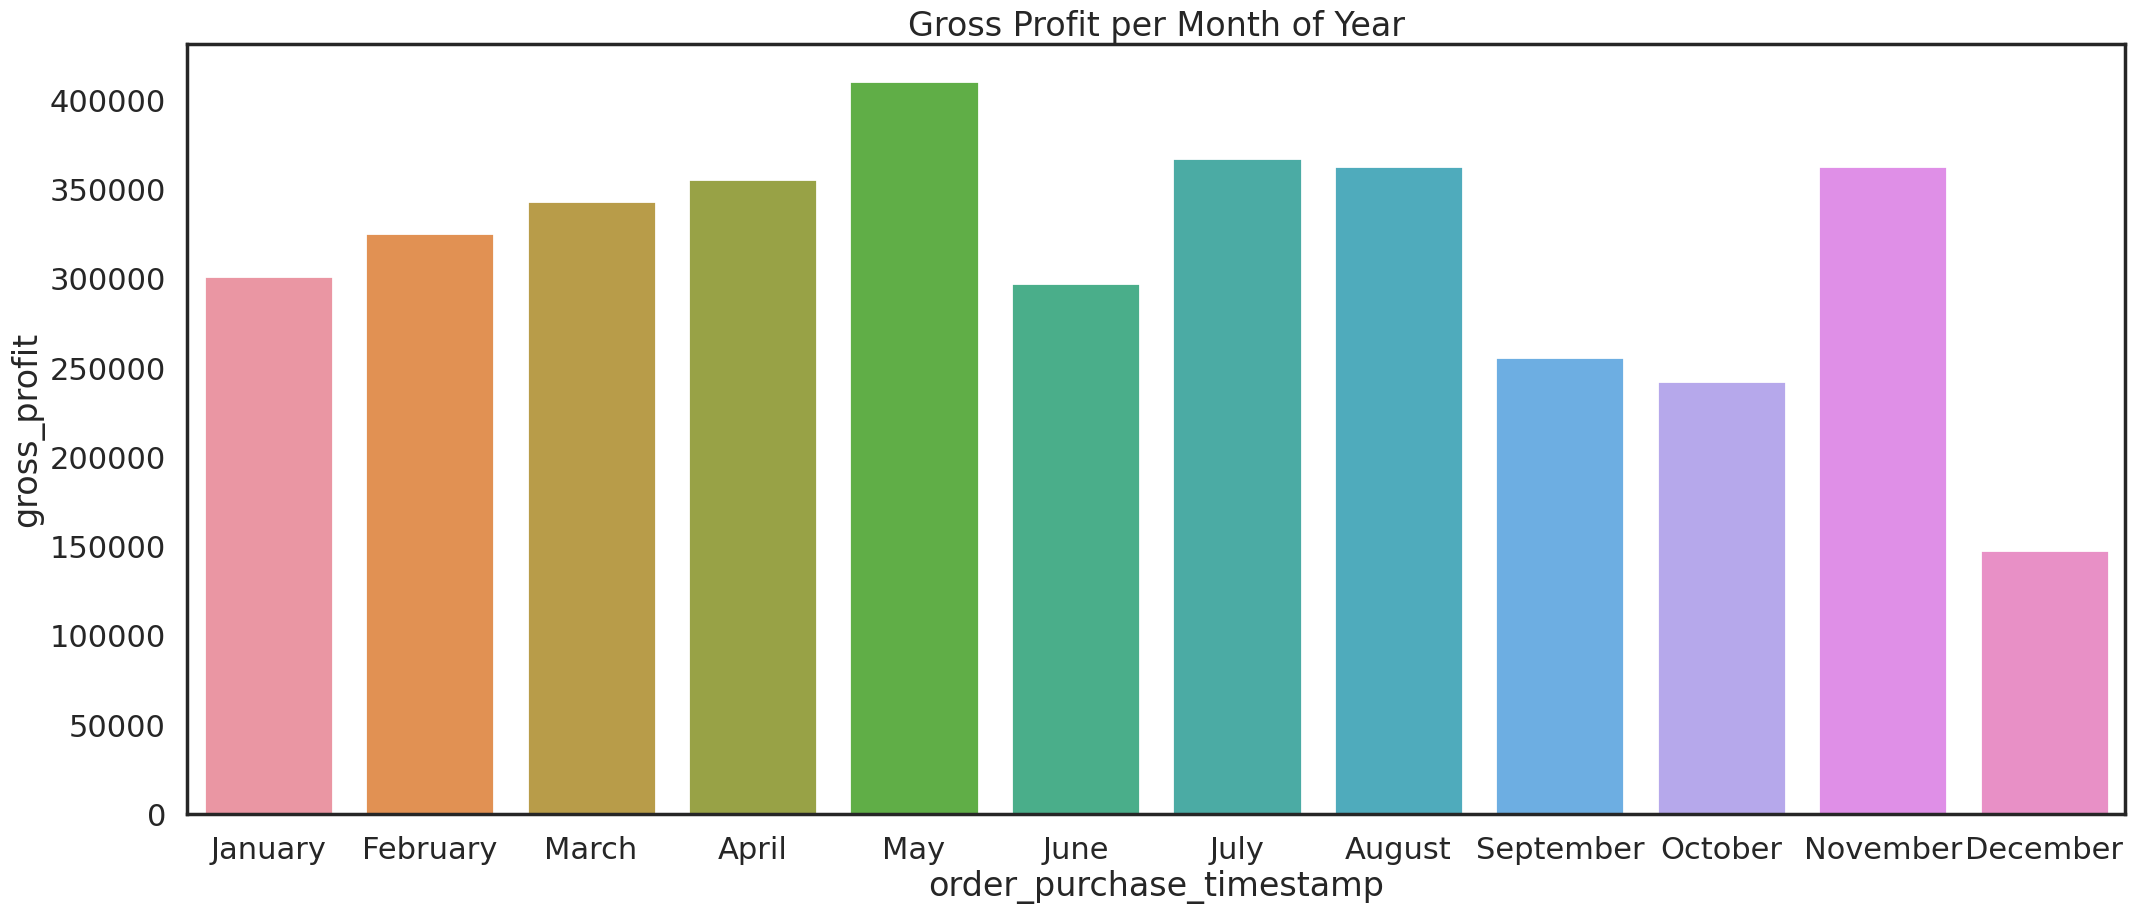

In [17]:
gross_profit_month = df.groupby(df.order_purchase_timestamp.dt.month).gross_profit.sum().reset_index()
plt.figure(figsize=(25,10))
# Map month numbers to month names
gross_profit_month['order_purchase_timestamp'] = gross_profit_month['order_purchase_timestamp'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 
                                               5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                                               9: 'September', 10: 'October', 11: 'November', 12: 'December'})
ax = sns.barplot(x='order_purchase_timestamp', y='gross_profit', data=gross_profit_month)
ax.set_title('Gross Profit per Month of Year')

### Besides the large outier when customers purchased over 1500 items in a single day, there is a clear trend between the items purchased and items shipped to customers. 

Referenced https://www.kaggle.com/code/jsaguiar/e-commerce-exploratory-analysis

In [18]:
# Product purchase by date

purchase_date = df.groupby([df['order_purchase_timestamp'].dt.date])['order_item_id'].sum().reset_index()
delivered_date = df.groupby([df['order_delivered_customer_date'].dt.date])['order_item_id'].sum().reset_index()
# Plot timeseries
purchasingplot = go.Scatter(x=purchase_date.order_purchase_timestamp, y=purchase_date.order_item_id, opacity = 0.8, name='Items Sold')
deliveredplot = go.Scatter(x=delivered_date.order_delivered_customer_date, y=delivered_date.order_item_id, opacity = 0.8, name='Items Delivered to Customer')
traces = [purchasingplot, deliveredplot]
layout = dict(
    title= "Product sold and delivered by date",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='12m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)
fig_dict = dict(data= traces, layout=layout)
fig = go.Figure(fig_dict)
fig.show(renderer='iframe')

### Removing >1500 items sold from dataset to properly analysis trends. Data shows items being purchased and shipped at similar rates. Orders delivered zig zap up and down based on lumping items together when shipping out to customers. 

In [19]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
layout.update(width=1000)
# Sum the gross profit for each day for each category
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.date
daily_gross_profit = df.groupby(['order_purchase_date', 'product_category_name_english'])['gross_profit'].sum().reset_index()

# Create traces for each product category
traces = []
for category in daily_gross_profit['product_category_name_english'].unique():
    category_data = daily_gross_profit[daily_gross_profit['product_category_name_english'] == category]
    trace = go.Scatter(
        x=category_data['order_purchase_date'],
        y=category_data['gross_profit'],
        mode='lines',
        name=category
    )
    traces.append(trace)

# Define the layout
layout = go.Layout(
    title='Gross Profit Over Time by Product Category',
    xaxis=dict(title='Order Purchase Timestamp'),
    yaxis=dict(title='Gross Profit')
)

# Create the figure as a dictionary
fig_dict = dict(data= traces, layout=layout)
fig = go.Figure(fig_dict)
fig.show(renderer='iframe')

### Impressively, over 138K of items were purchased and delivered to customers. Out of this, only 733 items were cancelled. 

In [20]:
order_status = df.groupby('order_status')['order_item_id'].sum().reset_index(name='order_item_id')

fig = go.Figure(data=[
    go.Bar(name='Order Status', x=order_status['order_status'], y=order_status['order_item_id'])
])

fig.update_layout(
    title='Order Status Count',
    xaxis_title='Order Status',
    yaxis_title='Count',
    barmode='group'
)

fig.show(renderer='iframe')

### Olist is averaging 12 days from purchase to delivery. Estimated delivery and actual deliver times have an average difference of 11 days showing shipping estimates is a place to work on improving. 

In [21]:
df['purchase_to_delivery'].dt.days
df['purchase_to_delivery'] = df['purchase_to_delivery'].dt.round('D').dt.days
df['estimated_to_delivery'].dt.days
df['estimated_to_delivery'] = df['estimated_to_delivery'].dt.round('D').dt.days
print(f"{df['purchase_to_delivery'].mean()} is the mean number of days it takes for a product to be delivered after purchase")
print(f"{df['estimated_to_delivery'].mean()} is the mean number of days early or late a product is delivered compared to the estimated delivery date")

-12.448117039110972 is the mean number of days it takes for a product to be delivered after purchase
11.179706538082646 is the mean number of days early or late a product is delivered compared to the estimated delivery date


### Mering geolocation dataset to find latitude and longitude for plotting in Folium. 

### Aggregating by State since df_geolocation dataframe is very large and exceeds memory when merging with orders dataframe. 

In [22]:
df_geolocation = df_geolocation.groupby('geolocation_state').agg({
    'geolocation_zip_code_prefix': 'first',
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first'
}).reset_index()
df_geolocation

,geolocation_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,AC,4011,-9.702555,-68.451852,sao paulo
1,AL,57060,-9.599729,-36.052017,maceio
2,AM,69060,-3.349336,-60.537430,manaus
3,AP,68901,0.086025,-51.234304,macapa
4,BA,40080,-13.049361,-39.560649,salvador
5,CE,60010,-4.363151,-39.004140,fortaleza
6,DF,70057,-15.810885,-47.969630,brasilia
7,ES,29010,-20.105145,-40.503183,vitória
8,GO,72860,-16.577645,-49.334195,novo gama
9,MA,65020,-3.798997,-44.818627,sao luis


In [23]:
df = pd.merge(df, df_geolocation, how='left', left_on='customer_state', right_on='geolocation_state')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_order_value,gross_profit,profit_margin,volume,hour,day,month,purchase_to_delivery,estimated_to_delivery,order_purchase_date,geolocation_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,b02f2888891cd431e71f2f0a9a85e7b8,53d5e3e5a2eb022edd3570dde355947b,delivered,2018-04-28 23:14:00,2018-05-01 02:10:24,2018-05-02 15:14:00,2018-05-04 00:03:45,2018-05-16,1.0,0b2a1288e8ba64c797e7586c8df75602,06579cb253ecd5a3a12a9e6eb6bf8f47,2018-05-07 02:10:24,96.9,7.54,1.0,boleto,1.0,104.44,7e2dea23a52b5601773bf9e2ea9e6b91,5.0,Muito bom e pratico.,Otimo produto pro dia a dia.\r\n,2018-05-05,2018-05-07 22:23:20,agro_industria_e_comercio,38.0,397.0,1.0,3450.0,33.0,36.0,33.0,03a4abdc6deb7b5b3c18b4cde6d63761,7500,santa isabel,SP,4007.0,sao paulo - sp,SP,agro_industry_and_commerce,104.44,-1.421085e-14,-1.360672e-16,39204.0,23,28,4,-5.0,12.0,2018-04-28,SP,1037,-23.155308,-47.084074,sao paulo
1,73455801790c8a31e404a3d4861f3d61,d04b1ea9de553c20d8315f98cf8289a2,delivered,2017-12-10 23:01:37,2017-12-10 23:17:27,2017-12-11 23:25:37,2017-12-20 16:48:51,2017-12-28,1.0,3a2b04bd67f105099d662e522bec56e9,06579cb253ecd5a3a12a9e6eb6bf8f47,2017-12-14 23:17:27,89.9,7.88,1.0,credit_card,9.0,97.78,9e64f0997df9ff040667677751c4030a,4.0,NaN,NaN,2017-12-21,2017-12-31 12:29:11,agro_industria_e_comercio,38.0,397.0,1.0,3275.0,35.0,37.0,19.0,d3beb4deb410a98b8f5406a88aa1ad94,13206,jundiai,SP,4007.0,sao paulo - sp,SP,agro_industry_and_commerce,97.78,0.000000e+00,0.000000e+00,24605.0,23,10,12,-10.0,7.0,2017-12-10,SP,1037,-23.155308,-47.084074,sao paulo
2,9df16fc9c0296bef63c2effb85d6969c,7dfcf04eef8eb511409413ca6bed1fed,delivered,2018-06-25 21:02:52,2018-06-25 21:15:26,2018-06-27 11:32:00,2018-07-12 22:11:16,2018-08-02,1.0,1df0508de978ce519aa5533ae04154c7,0ed6ce5d87fd9c69eaacaeb778d67235,2018-07-04 21:15:26,124.9,43.15,1.0,credit_card,3.0,168.05,f2d2620c4423b341b38a58c3a0caa022,5.0,10,NaN,2018-07-13,2018-07-14 22:03:39,agro_industria_e_comercio,59.0,707.0,5.0,1900.0,40.0,15.0,20.0,9b6839b18c37508b3a07fdec4c9572c0,62350,ubajara,CE,13473.0,americana,SP,agro_industry_and_commerce,168.05,0.000000e+00,0.000000e+00,12000.0,21,25,6,-17.0,20.0,2018-06-25,CE,60010,-4.363151,-39.004140,fortaleza
3,e4865416690d1f1fdad49bc94f871de6,8457dd875ae43c9b34240808ff8bb757,delivered,2017-11-29 12:48:56,2017-11-29 13:15:54,2017-12-05 18:53:19,2017-12-06 16:59:11,2017-12-13,1.0,cf4f52b8f3c906f11d98e8866614f140,0ed6ce5d87fd9c69eaacaeb778d67235,2017-12-05 13:15:54,39.9,9.74,1.0,boleto,1.0,49.64,8c3000c17781e092bff3e1df8711c794,4.0,NaN,NaN,2017-12-07,2017-12-08 03:47:27,agro_industria_e_comercio,54.0,365.0,2.0,600.0,30.0,15.0,15.0,0a7c72fec6e7d7917460e5a26f09dce9,12900,braganca paulista,SP,13473.0,americana,SP,agro_industry_and_commerce,49.64,0.000000e+00,0.000000e+00,6750.0,12,29,11,-7.0,6.0,2017-11-29,SP,1037,-23.155308,-47.084074,sao paulo
4,5e0ff060a686922559e33f8dbe998e41,ba03825db0f92dbade0ec0278a6e26ae,delivered,2018-07-24 21:30:58,2018-07-24 21:45:09,2018-08-09 15:19:00,2018-08-13 19:16:51,2018-08-15,1.0,ba1d7e7ee1f055d252a2faa8ea3cea9b,0ed6ce5d87fd9c69eaacaeb778d67235,2018-08-05 21:45:09,109.9,15.08,1.0,credit_card,2.0,124.98,9f98c17fd117aef60d72f3f94338232e,5.0,NaN,NaN,2018-08-14,2018-08-17 00:38:22,agro_industria_e_comercio,59.0,693.0,6.0,1

### Folium plot shows the top hundred orders based on payment value. Each marker identifies the rank of the order. 

In [24]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

top_orders = df.groupby(['order_id', 'product_category_name_english', 'geolocation_lat', 'geolocation_lng'])['payment_value'].sum().reset_index()
top_orders = top_orders.sort_values(by='payment_value', ascending=False)
top_hundred_orders = top_orders.head(100)
top_hundred_orders['rank'] = range(1, len(top_hundred_orders) + 1)

# Create a Folium map centered around the average location of the top ten orders
map_center = [top_hundred_orders['geolocation_lat'].mean(), top_hundred_orders['geolocation_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Add markers for the top ten locations
marker_cluster = MarkerCluster().add_to(m)
for idx, row in top_hundred_orders.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=f"Rank: {row['rank']} Order ID: {row['order_id']}<br>Category: {row['product_category_name_english']}<br>Payment Value: {row['payment_value']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
m.save('top_hundred_orders_map.html')
m

### As shown in Folium from the top hundred orders, San Paulo, Rio de Janeiro, and Minas Gerais are the three most critical States for the Olist business. 

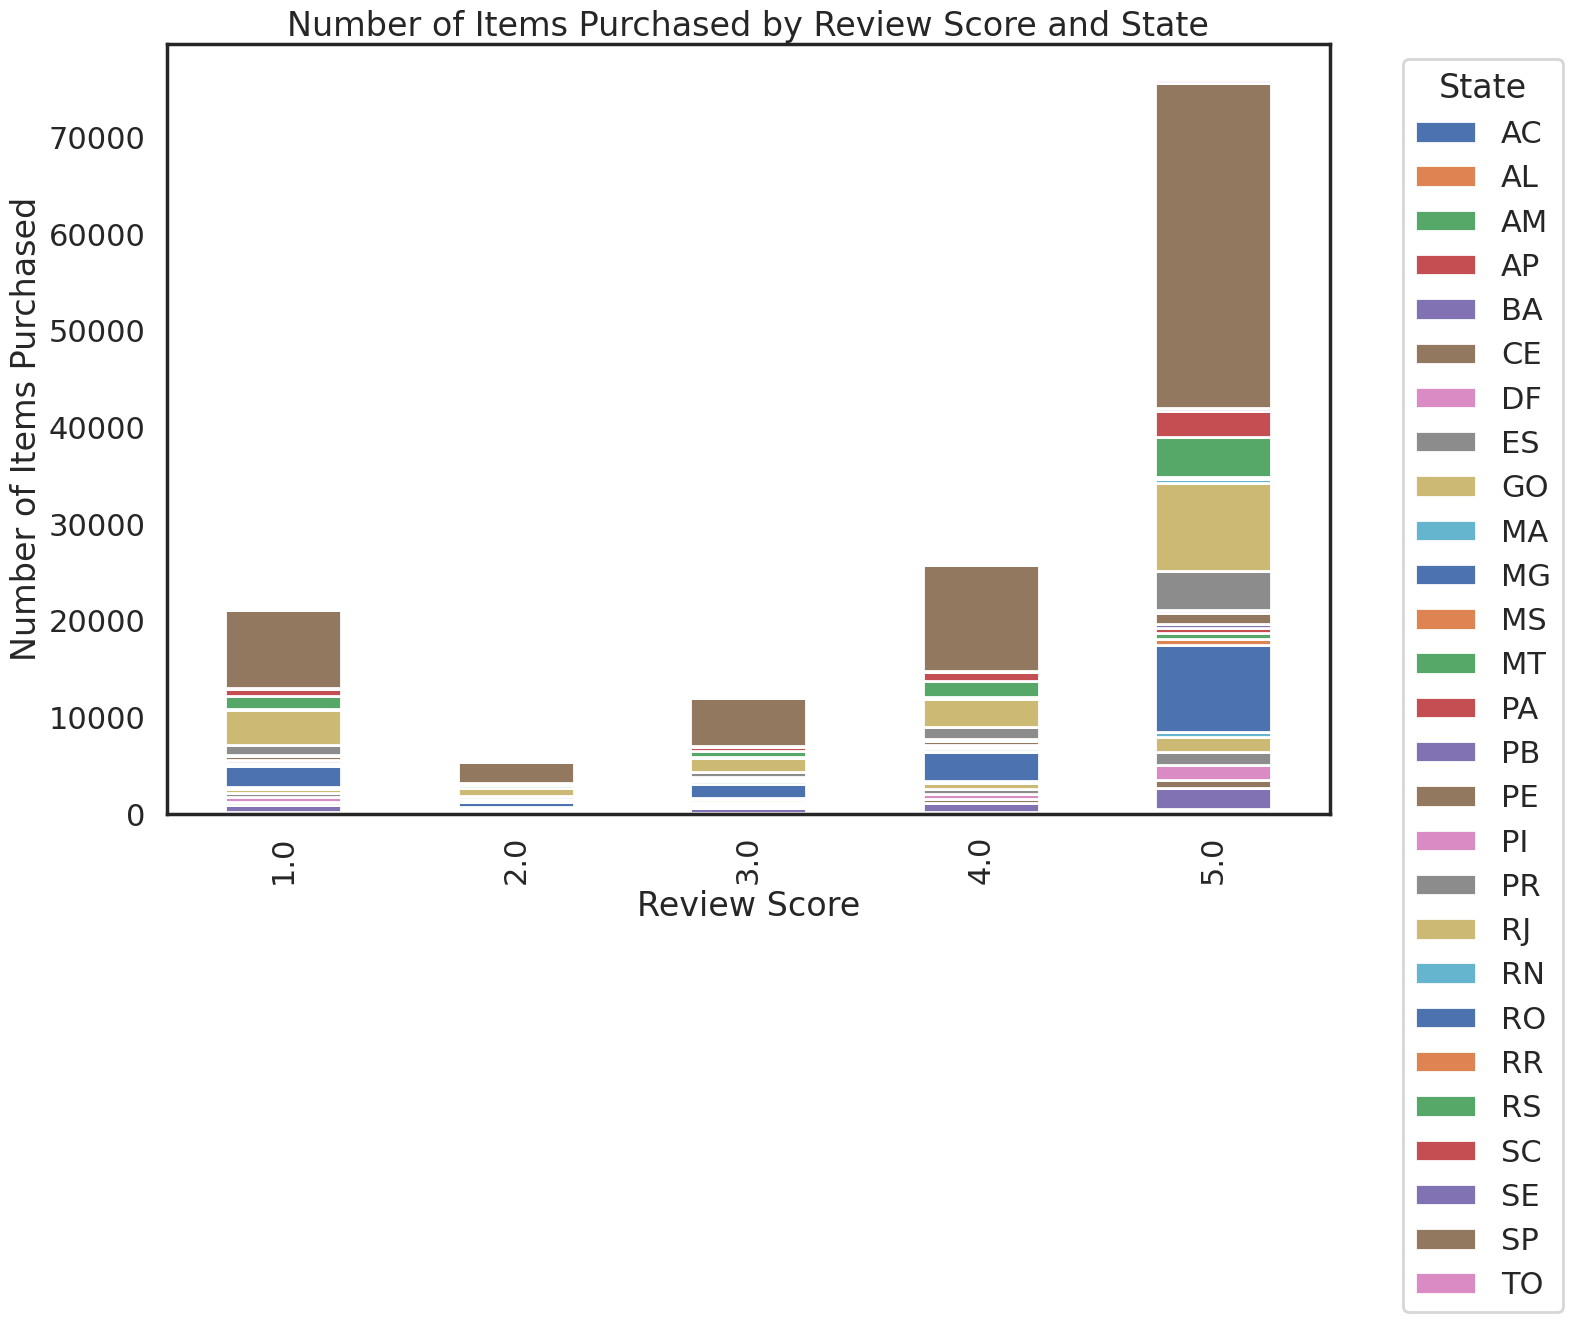

In [25]:
review_score_df = df.groupby(['review_score','geolocation_state'])['order_item_id'].sum()
review_score_df = review_score_df.unstack().fillna(0)

review_score_df

# Plot the data
review_score_df.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Number of Items Purchased by Review Score and State')
plt.xlabel('Review Score')
plt.ylabel('Number of Items Purchased')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

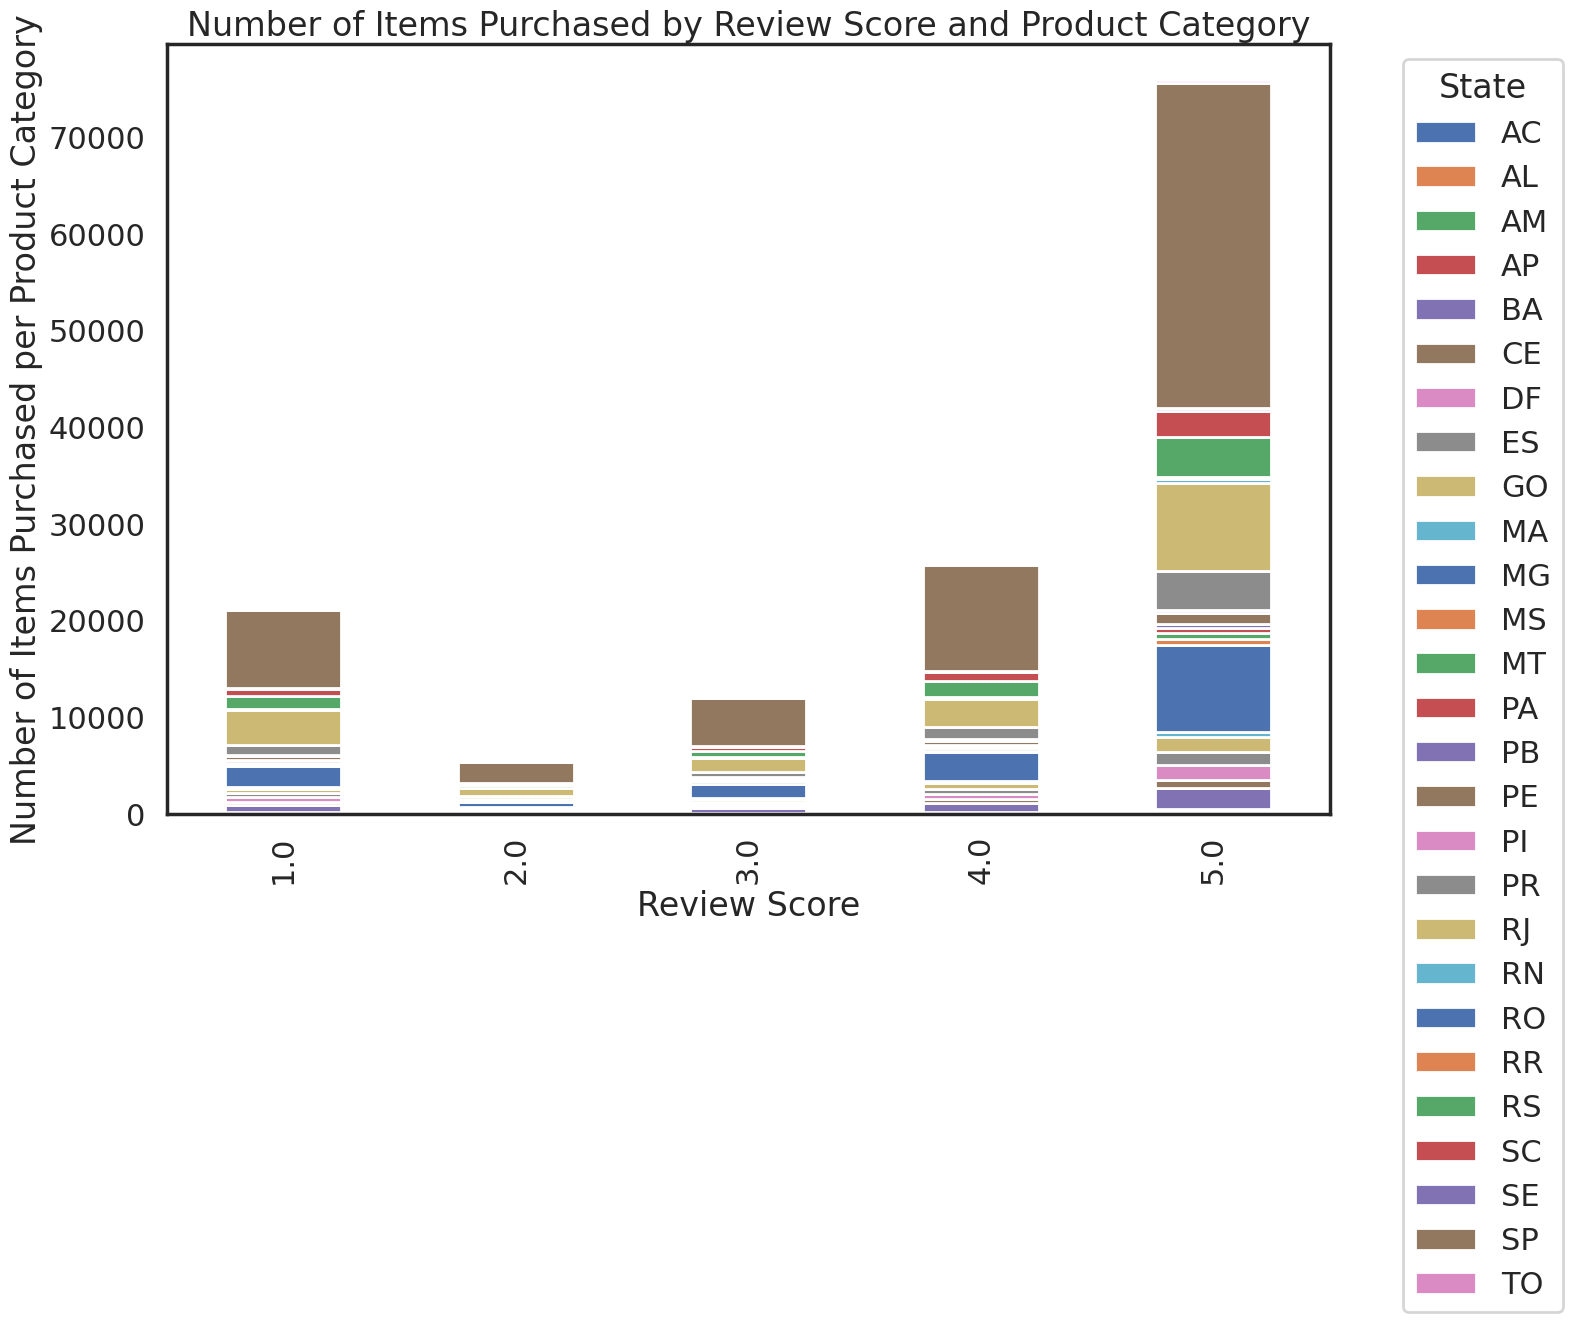

In [26]:
review_score_product_df = df.groupby(['review_score', 'product_category_name_english'])['order_item_id'].sum()
review_score_product_df = review_score_df.unstack().fillna(0)

# Plot the data
review_score_df.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Number of Items Purchased by Review Score and Product Category')
plt.xlabel('Review Score')
plt.ylabel('Number of Items Purchased per Product Category')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
review_score_product_df

geolocation_state  review_score
AC                 1.0               7.0
                   2.0              11.0
                   3.0               9.0
                   4.0              16.0
                   5.0              75.0
                                   ...  
TO                 1.0              30.0
                   2.0              16.0
                   3.0              40.0
                   4.0              79.0
                   5.0             227.0
Length: 135, dtype: float64

## Future work with this dataset. 

## Freight versus Distance

### While merging the latitude and longitude, I wanted to see how freight value changes with distance from seller to customer but each time I merged the geolocation dataset for both the customer cities, my dataframe would exceed 17 millions rows. 

### Feel free to reach out if you want to work on this. Calculating distance involves the Haversine formula - function shown below.

In [28]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth's surface given their latitude and longitude in decimal degrees.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [29]:
lat1, lon1 = df[df['geolocation_state'] == 'SP'][['geolocation_lat', 'geolocation_lng']].iloc[0]
lat2, lon2 = df[df['geolocation_state'] == 'RO'][['geolocation_lat', 'geolocation_lng']].iloc[0]
print(f"San Paulo is {haversine(lat1,lon1,lat2,lon2)} kilometers from Rio de Janeiro")

San Paulo is 2187.7088560013 kilometers from Rio de Janeiro
